In [1]:
import pandas as pd
import numpy as np
import re

import nltk #natural language toolkit
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df = pd.read_table("musical1.tsv")

sentences = df["Review"] 

y = df['Score']

corpus = []

for sentence in sentences:
    
    sentence = sentence.lower()
    
    # essentially split into words
    words = word_tokenize(sentence)
    
    #Stemming - also switches to root word, also ensures no stopwords 
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]

    
    #Lemmatize - swich word to base root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    sentence = ' '.join(words)
    
    corpus.append(sentence)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(norm='l2', max_features = 15)
tfidf = v.fit_transform(corpus)

X = tfidf.toarray() # this extracts the values that were calculated via the funtions

#do 80-20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

rf = RandomForestClassifier(criterion='gini', random_state=5)

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

score = rf.score(X_test, Y_test)

print("Random Forest Accuracy Score: {}".format(round(score, 3)))
print()

cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()

print(classification_report(Y_test, y_pred))


Actual: [0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0]
Predicted: [0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1]

Random Forest Accuracy Score: 0.575

Confusion Matrix:
[[48 42]
 [43 67]]

              precision    recall  f1-score   support

           0       0.53      0.53   

In [3]:
print("accuracy = 0.77")
print("precision = 0.77 (average)")
print("F1-score = 0.77(average)")

accuracy = 0.77
precision = 0.77 (average)
F1-score = 0.77(average)


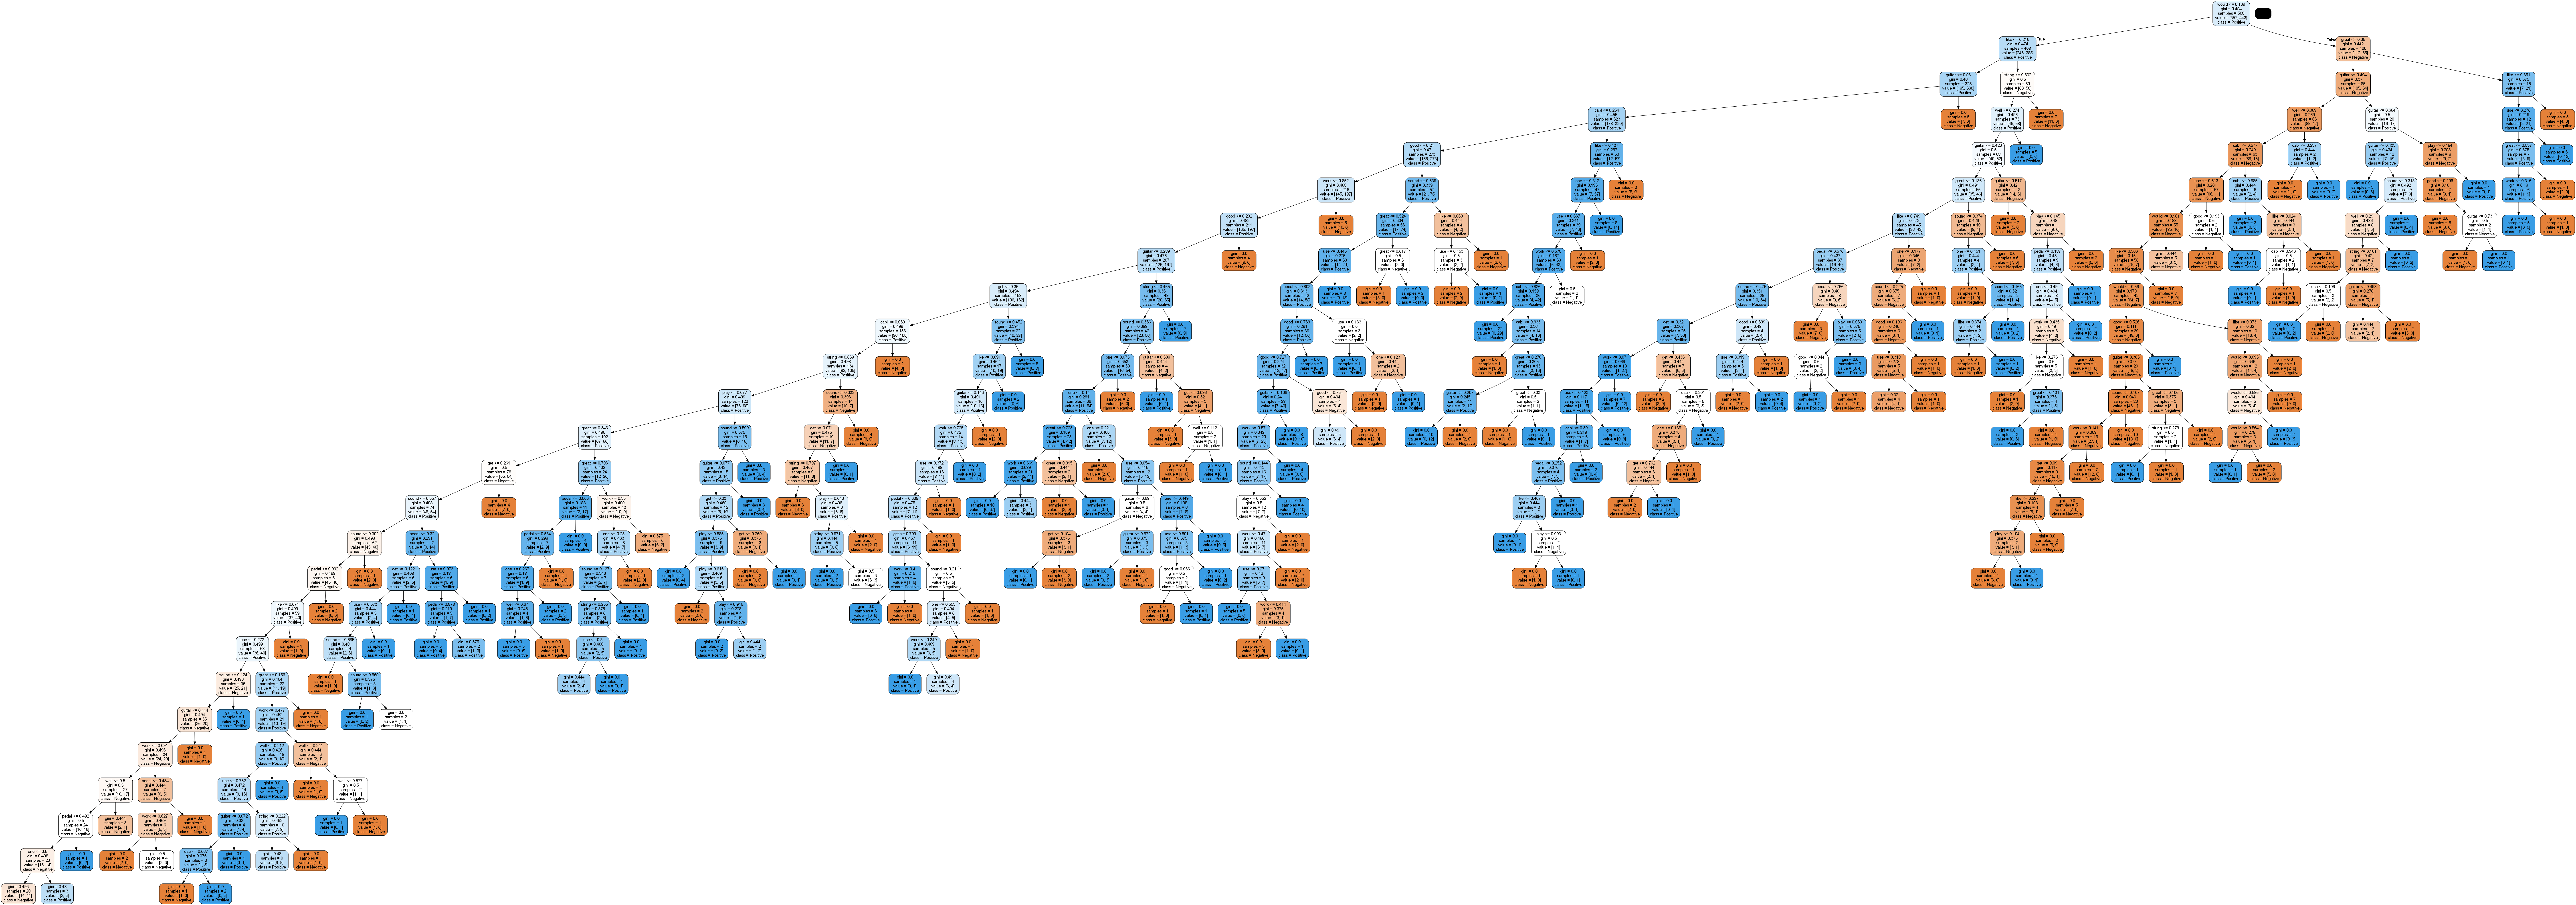

In [4]:
from sklearn.tree import export_graphviz

from IPython.display import Image

import pydotplus

estimator = rf.estimators_[0]

dot_data = export_graphviz(estimator, out_file=None, feature_names=v.get_feature_names_out(),
                          class_names=['Negative','Positive'], rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())